# Hemuppgift 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Del 1
Importera datafilen pendel3.csv.

In [4]:
data = np.genfromtxt('pendel3.csv', delimiter=',', skip_header=1, usecols = (2, 3, 4, 5))

Gör en graf över periodtiden som funktion av pendelns längd med osäkerheter. Skapa en titel på grafen med *plt.title('Min titel')*. Sätt ut namn och enheter på axlarna med *plt.xlabel('Namn på x')* och *plt.ylabel('Namn på y')*. Om du vill kan du justera storleken på figuren och typsnitten så att det ser bra ut.

<ErrorbarContainer object of 3 artists>

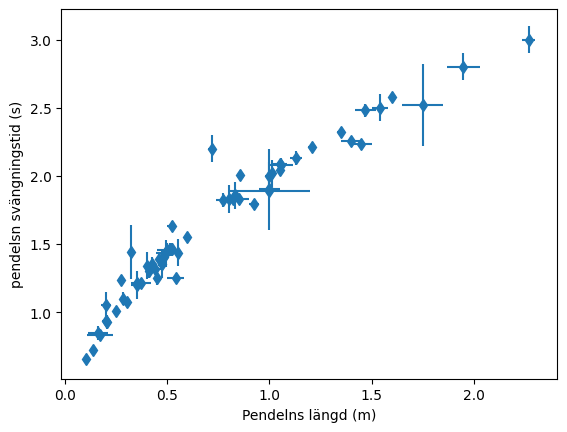

In [5]:
T = data[:,2]/10
dT = data[:,3]/10
l = data[:,0]
dl = data[:,1]

plt.xlabel('Pendelns längd (m)')
plt.ylabel('pendelsn svängningstid (s)')
plt.errorbar(l, T, xerr=dl, yerr=dT, fmt='d')

Från vår figur kan vi gissa att $T \propto l^b$, dvs $T = a \cdot l^b$. (Antag tills vidare att vi inte vet det korrekta sambandet.) Gör en graf över $y = \ln(T)$ som funktion av $x = \ln(l)$ med osäkerheter. Glöm inte att propagera osäkerheterna i $x$ och $y$. Rita också in en rät linje som så bra som möjligt beskriver data.

*Tips 1: ln(x) beräknas i numpy med funtionen np.log(x).*

*Tips 2: En rät linje erhålls genom att välja två punkter ($[x_1, y_1]$ och $[x_2,y_2]$), och sedan anropa* plt.plot($[x_1, x_2]$,$[y_1,y_2]$).

<ErrorbarContainer object of 3 artists>

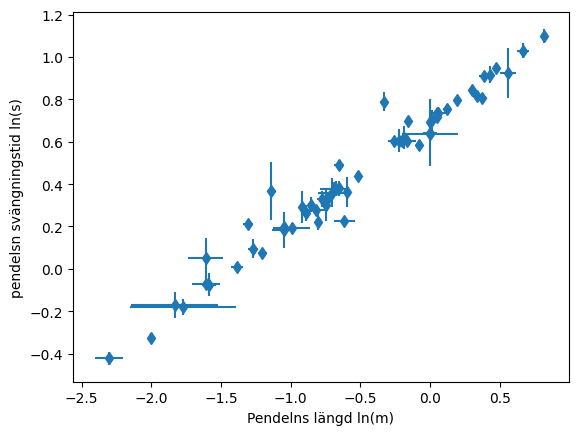

In [6]:
lnT = np.log(T)
lnl = np.log(l)
dlnT = dT/T
dlnl = dl/l

plt.xlabel('Pendelns längd ln(m)')
plt.ylabel('pendelsn svängningstid ln(s)')
plt.errorbar(lnl, lnT, xerr=dlnl, yerr=dlnT, fmt='d')

Verkar sambandet linjärt? Om ja, använd din räta linje för att bestämma värdet på konstanten $b$.

Ja

Slope=0.47298508959601426 Shift=0.696635321921334


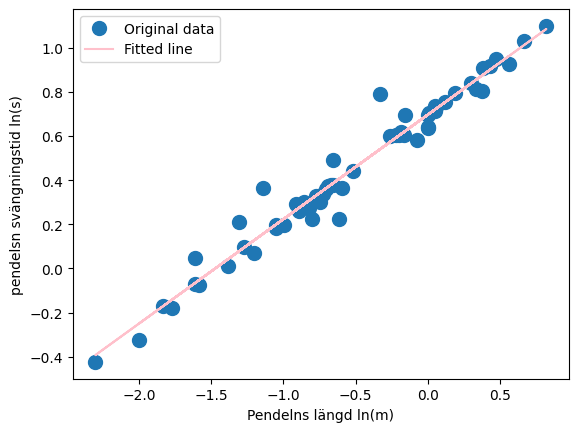

In [7]:
A = np.vstack([lnl, np.ones(len(lnl))]).T
m, c = np.linalg.lstsq(A, lnT, rcond=None)[0]
plt.xlabel('Pendelns längd ln(m)')
plt.ylabel('pendelsn svängningstid ln(s)')
plt.plot(lnl, lnT, 'o', label='Original data', markersize=10)
plt.plot(lnl, m*lnl + c, 'pink', label='Fitted line')
print(f'Slope={m} Shift={c}')
plt.legend()
plt.show()


### Del 2

I Hemuppgift 2 löste du ut tyngdaccelerationen ($g$) ur formeln för en matematisk pendel:
$T = 2\pi \sqrt{\frac{l}{g}}$ och kom fram till:

$g = 4 \pi^2 \frac{l}{T^2}$

Härled formeln för osäkerheten i $g$.

*Tips: Härled en formel för $\frac{\delta g}{g}$ och och uttryck sedan osäkerheten i $g$ som $\delta g = \frac{\delta g}{g}\cdot g$ 
(Se också kapitel 3.9 i kursboken).*

Skriv din härledning och resultatet i $\LaTeX$ här:

Eftersom vi har g beroende av två variabler l och T² och deras respektive osäkerheter är oberoende så blir osäkerheten i g den vinkelräta summa av osäkerheterna i l och T². Genom detta får vi

$
\delta T^2 = \frac{d}{dT} \frac{T^2}{T^2} = 2\frac{\delta T}{T}
$

Då får vi

$
\frac{\delta g}{g} =  \sqrt{(\frac{\delta l}{l})^2 + (2\frac{\delta T}{T})^2} 
$

$
\delta g = g \sqrt{(\frac{\delta l}{l})^2 + (2\frac{\delta T}{T})^2} 
$

Beräkna $g$ och osäkerheten i $g$ för samtliga mätdata. Gör en graf över data med osäkerheter tillsammans med en linje som markerar standardvärdet för tyngdaccelerationen. Hämta aktuellt värde på $g$ från exempelvis
https://physics.nist.gov/cuu/Constants/

Om du vill zoom in i grafen kan du sätt skalan på axlarna manuellt med komandot *plt.axis([x_min,x_max,y_min,y_max])*.

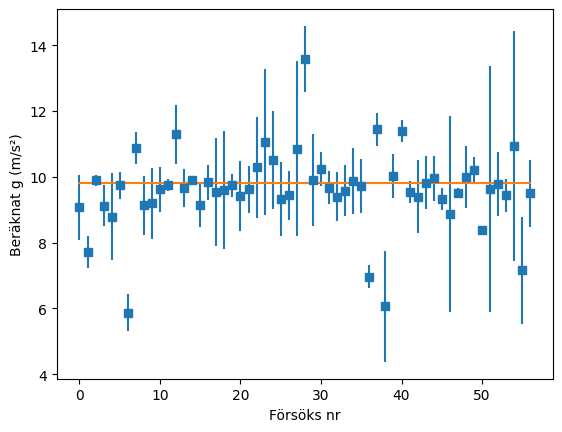

In [13]:
g = (4 * np.pi**2 * l)/(T**2)
dg = g * np.sqrt((dl/l)**2 + (2 * (dT/T))**2)

plt.ylabel('Beräknat g (m/s²)')
plt.xlabel('Försöks nr')
plt.errorbar(np.arange(len(g)), g, yerr=dg, fmt = 's')
plt.plot(np.arange(len(g)), np.repeat(9.806, len(g)))

Stämmer mätdata med standardvärdet?

Den stora majoriteten av datapunkterna stämmer överens. Det finns dock en grupp som enligt beräknade värden och osäkerheter inte kan uppnå standard värdet. 